In [63]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cartopy.crs as ccrs
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean as cm

In [52]:
#load datasets
ds = xr.open_dataset('/net/kryo/work/koehne/roms/output/humpac15/N64ts10tb4hc250_grd_merged_SiO3_PO4_fix/humpac15_spinup_10yrs_phys_and_bio/monthly/his/humpac15_1981_his.nc')
print('Data Loaded')
grid = xr.open_dataset('/net/nardus/work/Ana/masks_and_maps/humpac_grids/humpac15_sm5rf015_grd.nc')
print('Grid Loaded')

/home/koehne/.conda/envs/eikes_miniconda/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/home/koehne/.conda/envs/eikes_miniconda/lib/python3.6/site-packages/xarray/coding/variables.py:69: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array)


Data Loaded
Grid Loaded


In [57]:
ds.temp[0,63,:,:]

<xarray.DataArray 'temp' (eta_rho: 1009, xi_rho: 701)>
[707309 values with dtype=float32]
Coordinates:
    lon_rho  (eta_rho, xi_rho) float32 ...
    lat_rho  (eta_rho, xi_rho) float32 ...
    time     object 0013-01-05 00:00:00
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  potential temperature
    units:      Celsius

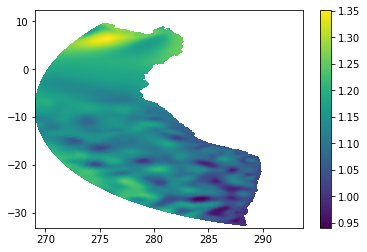

In [3]:
#plot some data
fig,ax = plt.subplots()
c0 = ax.pcolor(grid.lon_rho[:200,:],grid.lat_rho[:200,:],ds.zeta[0,:200,:])
plt.colorbar(c0)
plt.show()

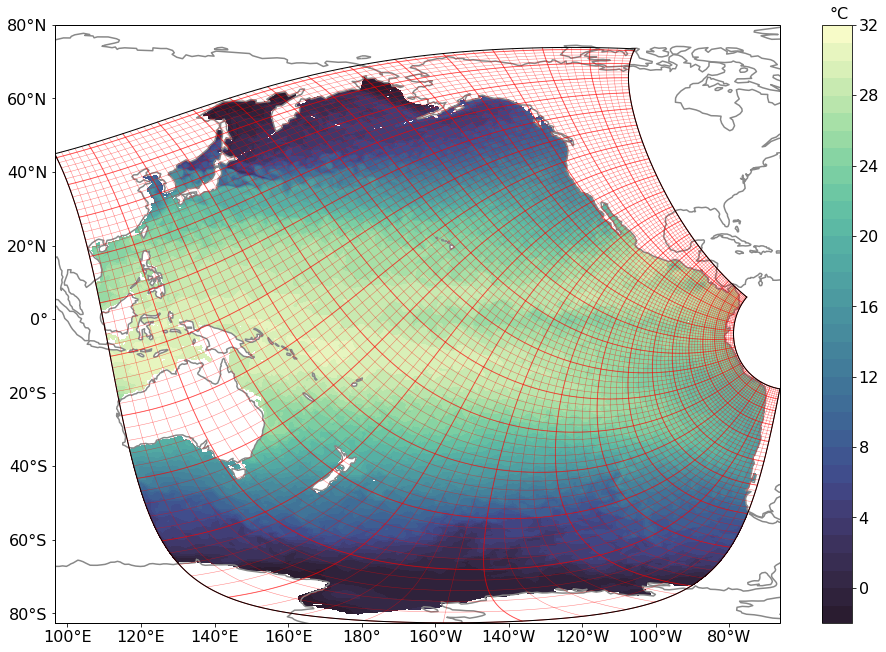

In [77]:
# Plot HUMPAC15 Grid
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(15,11))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.coastlines(color='#888888',linewidth=1.5)
c0 = ax.contourf(grid.lon_rho-360.,grid.lat_rho,ds.temp[0,63,:,:],40,transform=ccrs.PlateCarree(),cmap=cm.cm.deep_r)
#spac0 = 5
#ax.plot(grid.lon_rho[::1,::spac0]-360.,grid.lat_rho[::1,::spac0],'-r',linewidth=0.5,alpha=0.2,transform=ccrs.PlateCarree())
#ax.plot((grid.lon_rho[::spac0,::1].transpose())-360.,grid.lat_rho[::spac0,::1].transpose(),'-r',linewidth=0.5,alpha=0.2,transform=ccrs.PlateCarree())
spac = 10
ax.plot(grid.lon_rho[::1,::spac]-360.,grid.lat_rho[::1,::spac],'-r',linewidth=0.5,alpha=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[::spac,::1].transpose())-360.,grid.lat_rho[::spac,::1].transpose(),'-r',linewidth=0.5,alpha=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[::1,::spac2]-360.,grid.lat_rho[::1,::spac2],'-r',linewidth=1,alpha=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[::spac2,::1].transpose())-360.,grid.lat_rho[::spac2,::1].transpose(),'-r',linewidth=1,alpha=0.5,transform=ccrs.PlateCarree())
# Frame lines
ax.plot(grid.lon_rho[::1,-1]-360.,grid.lat_rho[::1,-1],'-k',linewidth=1,alpha=1,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[-1,::1].transpose())-360.,grid.lat_rho[-1,::1].transpose(),'-k',linewidth=1,alpha=1,transform=ccrs.PlateCarree())
ax.plot(grid.lon_rho[::1,0]-360.,grid.lat_rho[::1,0],'-k',linewidth=1,alpha=1,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[0,::1].transpose())-360.,grid.lat_rho[0,::1].transpose(),'-k',linewidth=1,alpha=1,transform=ccrs.PlateCarree())
# Label axes of a Plate Carree projection with a central longitude of 180:
ax.set_xticks([100, 120, 140, 160, 180, 200, 220, 240, 260, 280], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cb = plt.colorbar(c0,fraction=0.04)
cb.set_label('°C', labelpad=-40, y=1.03, rotation=0)
plt.savefig('humpac15_grid.png',dpi=300)
plt.show()

In [5]:
# what is minimum latitude?
print(np.min(np.min(grid.lat_rho)))

<xarray.DataArray 'lat_rho' ()>
array(-82.59038)


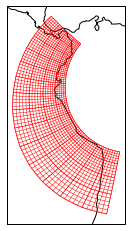

In [5]:
# Plot HUMPAC15 Grid Zoomed to Peru
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
max1 = 210
spac = 10
ax.plot(grid.lon_rho[:max1:spac,::spac]-360.,grid.lat_rho[:max1:spac,::spac],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac,::spac].transpose())-360.,grid.lat_rho[:max1:spac,::spac].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[:max1:spac2,::spac2]-360.,grid.lat_rho[:max1:spac2,::spac2],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac2,::spac2].transpose())-360.,grid.lat_rho[:max1:spac2,::spac2].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
plt.show()

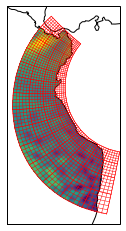

In [6]:
# Plot HUMPAC15 Grid Zoomed to Peru with data
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
c0 = ax.pcolor(grid.lon_rho[:200,:]-360.,grid.lat_rho[:200,:],ds.zeta[0,:200,:])
max1 = 210
spac = 10
ax.plot(grid.lon_rho[:max1:spac,::spac]-360.,grid.lat_rho[:max1:spac,::spac],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac,::spac].transpose())-360.,grid.lat_rho[:max1:spac,::spac].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[:max1:spac2,::spac2]-360.,grid.lat_rho[:max1:spac2,::spac2],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac2,::spac2].transpose())-360.,grid.lat_rho[:max1:spac2,::spac2].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
plt.show()